Project Antisocialina - Classification with Traditional Machine Learning
Fitri Andri Astuti/ 23220030
23220030@std.stei.itb.ac.id

1.Import Library yang akan dibutuhkan

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')  # "error", "ignore", "always", "default", "module" or "once"

from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.naive_bayes import MultinomialNB
import numpy as np
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report, confusion_matrix

from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_extraction.text import TfidfVectorizer

2.Baca data excel dari proses labelling manual

In [2]:
df = pd.read_excel("antisocialina_labelling.xlsx", sheet_name='tweet_train')
df.head()

,id,author_id,text,reply_count,like_count,created_at,lang,username,name,description,stage,idKeyword,keyword,idClass,classname,show,url_removing,stopword_removing,stemming,formalizing
0,1383081208339304450,1002599681128476672,@ksoopill Kok km selalu benar😭😭,1,0,2021-04-16 15:33:51,in,loeydoun,anin,❤Chanyeol❤ ❤Dowoon❤,data_acquisition,3,selalu benar,1,Kegagalan untuk menyesuaikan diri dengan norma...,NaN,kok km selalu benar,kok km selalu benar,kok km selalu benar,kok km selalu benar
1,1383079765934940160,99636823,Heran banget ya sama cowok kyk kamu gak ada em...,0,0,2021-04-16 15:28:07,in,nyunnsakti,nyun,cari apa kesini? ini cuma akun hiburan koq,data_acquisition,3,selalu benar,1,Kegagalan untuk menyesuaikan diri dengan norma...,NaN,heran banget ya sama cowok kyk kamu gak ada em...,heran banget sama cowok kyk kamu gak empati se...,heran banget sama cowok kyk kamu gak empati se...,heran banget sama cowok kyk kamu gak empati se...
2,1383077972198912005,47996430,@arsyadevn emang gua selalu benar,0,0,2021-04-16 15:20:59,in,Luffyprtm,"𝘼𝙡𝙫𝙖𝙧𝙚𝙨, Luffy",# Fictional Ikon yunhyeong,data_acquisition,3,selalu benar,1,Kegagalan untuk menyesuaikan diri dengan norma...,NaN,emang gua selalu benar,emang gua selalu benar,emang gua selalu benar,emang gua selalu benar
3,1383083894828793857,546027240,@im_medusa_ Aku selalu benar,1,0,2021-04-16 15:44:31,in,dmcycdl,kratos,10% of me,data_acquisition,3,selalu benar,1,Kegagalan untuk menyesuaikan diri dengan norma...,NaN,medusa aku selalu benar,medusa aku selalu benar,medusa aku selalu benar,medusa aku selalu benar
4,1383083373061492746,1326104016653225984,@_AnakKolong wanita selalu benar dan pria sela...,1,1,2021-04-16 15:42:27,in,KinandLarasati,Larasati,Jangan Follow nanti nyesel,data_acquisition,3,selalu benar,1,Kegagalan untuk menyesuaikan diri dengan norma...,NaN,anakkolong wanita selalu benar dan pria selalu...,anakkolong wanita selalu benar pria selalu sal...,anakkolong wanita selalu benar pria selalu sal...,anakkolong wanita selalu benar pria selalu sal...


3.Cek nama kolom, type data, dan isian data apakah terdapat null value atau tidak

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1251 entries, 0 to 1250
Data columns (total 20 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   id                 1251 non-null   int64         
 1   author_id          1251 non-null   int64         
 2   text               1251 non-null   object        
 3   reply_count        1251 non-null   int64         
 4   like_count         1251 non-null   int64         
 5   created_at         1251 non-null   datetime64[ns]
 6   lang               1251 non-null   object        
 7   username           1199 non-null   object        
 8   name               1198 non-null   object        
 9   description        1066 non-null   object        
 10  stage              1251 non-null   object        
 11  idKeyword          1251 non-null   int64         
 12  keyword            1249 non-null   object        
 13  idClass            1251 non-null   int64         
 14  classnam

4.Identifikasi classname yang unik

In [4]:
df['classname'].value_counts()

Non-Antisosial / Umum                                                                    786
Kegagalan untuk menyesuaikan diri dengan norma-norma sosial tentang perilaku yang sah    272
Iritabilitas dan Agresivitas                                                             132
Pengabaian yang gegabah untuk Keamanan                                                    39
Kurangnya Penyesalan                                                                      22
Name: classname, dtype: int64

In [5]:
df.classname.value_counts()

Non-Antisosial / Umum                                                                    786
Kegagalan untuk menyesuaikan diri dengan norma-norma sosial tentang perilaku yang sah    272
Iritabilitas dan Agresivitas                                                             132
Pengabaian yang gegabah untuk Keamanan                                                    39
Kurangnya Penyesalan                                                                      22
Name: classname, dtype: int64

<AxesSubplot:>

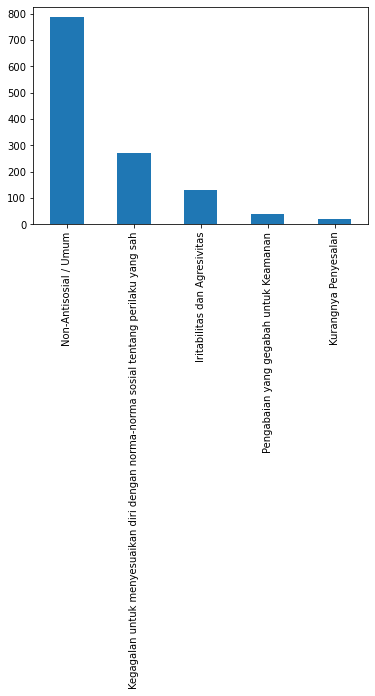

In [6]:
df.classname.value_counts().plot(kind='bar')

In [7]:
df_timeseries=df.groupby([df['created_at'].dt.date,df['classname']], as_index=False)['classname'].count()
# df_timeseries

In [8]:
df_timeseries=df.groupby([df['created_at'].dt.date,df['classname']])['classname']

In [9]:
df_classname = df.groupby([df['created_at'].dt.date,df['classname']])['classname'].count().reset_index(name="jumlah")

In [10]:
df_classname

,created_at,classname,jumlah
0,2021-04-10,Iritabilitas dan Agresivitas,89
1,2021-04-10,Kegagalan untuk menyesuaikan diri dengan norma...,1
2,2021-04-10,Non-Antisosial / Umum,213
3,2021-04-10,Pengabaian yang gegabah untuk Keamanan,5
4,2021-04-11,Iritabilitas dan Agresivitas,4
5,2021-04-11,Kegagalan untuk menyesuaikan diri dengan norma...,4
6,2021-04-11,Non-Antisosial / Umum,47
7,2021-04-11,Pengabaian yang gegabah untuk Keamanan,5
8,2021-04-12,Iritabilitas dan Agresivitas,1
9,2021-04-12,Kegagalan untuk menyesuaikan diri dengan norma...,4


5.Mulai untuk proses klasifikasi

In [11]:
data = df['formalizing']
label = df['idClass']

In [12]:
X_train, X_test, y_train, y_test = train_test_split(data, label, test_size=0.8,random_state=25)  # random urutan dan split ke data training dan test

print("Data training:")
print(len(X_train))
# print(Counter(y_train))

print("Data testing:")
print(len(X_test))
# print(Counter(y_test))

Data training:
250
Data testing:
1001


6.Klasifikasi dengan Model Naïve Bayes

In [13]:
# @pepo NB
print("\n ===== Predict Naive Bayes")
nb_model = Pipeline([('vect', CountVectorizer()),('tfidf', TfidfTransformer()),('clf', MultinomialNB())])
nb_model.fit(X_train, y_train)

pred = nb_model.predict(X_test)  # hitung akurasi data test
akurasi = np.mean(pred == y_test)

print("Akurasi MultinomialNB: {}".format(akurasi))
print(accuracy_score(y_test, pred))
print("\n ===== Predict Naive Bayes finished")
print('Naive Bayes: ')
print(confusion_matrix(y_test, pred))
print('Naive Bayes: ')
print(classification_report(y_test, pred))


 ===== Predict Naive Bayes
Akurasi MultinomialNB: 0.6503496503496503
0.6503496503496503

 ===== Predict Naive Bayes finished
Naive Bayes: 
[[ 29   0   0   0 196]
 [  0   0   0   0 104]
 [  0   0   0   0  31]
 [  0   0   0   0  19]
 [  0   0   0   0 622]]
Naive Bayes: 
              precision    recall  f1-score   support

           1       1.00      0.13      0.23       225
           2       0.00      0.00      0.00       104
           3       0.00      0.00      0.00        31
           4       0.00      0.00      0.00        19
           5       0.64      1.00      0.78       622

    accuracy                           0.65      1001
   macro avg       0.33      0.23      0.20      1001
weighted avg       0.62      0.65      0.54      1001



7.Buat word vector

In [14]:
vect = TfidfVectorizer()
vector_output = vect.fit_transform(data)

x_features = vector_output.toarray()

8.Klasifikasi dengan Model Logistics Regression

In [15]:
#@pepo LR
print("\n ===== Predict Logistics Regression")
X_train_lr, X_test_lr, y_train_lr, y_test_lr = train_test_split(x_features, label, test_size=0.3, random_state=17)
from sklearn.linear_model import LogisticRegression
lr_model = LogisticRegression(random_state=17, class_weight='balanced')
lr_model.fit(X_train_lr, y_train_lr)
y_pred_lr = lr_model.predict(X_test_lr)
print(confusion_matrix(y_test_lr, y_pred_lr))
print('Logistic Regression: ')
print(classification_report(y_test_lr, y_pred_lr))


 ===== Predict Logistics Regression
[[ 69   0   0   0  11]
 [  0  35   0   0   8]
 [  0   0   3   0  11]
 [  5   0   1   0   3]
 [ 24  31   7   1 167]]
Logistic Regression: 
              precision    recall  f1-score   support

           1       0.70      0.86      0.78        80
           2       0.53      0.81      0.64        43
           3       0.27      0.21      0.24        14
           4       0.00      0.00      0.00         9
           5       0.83      0.73      0.78       230

    accuracy                           0.73       376
   macro avg       0.47      0.52      0.49       376
weighted avg       0.73      0.73      0.72       376



9.Klasifikasi dengan Model Decision Tree

In [16]:
#@pepo DT
print("\n ===== Predict Decision Tree")
X_train_dt, X_test_dt, y_train_dt, y_test_dt = train_test_split(x_features, label, test_size=0.20)
from sklearn.tree import DecisionTreeClassifier
dt_model = DecisionTreeClassifier()
dt_model.fit(X_train_dt, y_train_dt)
y_pred_dt = dt_model.predict(X_test_dt)
print(confusion_matrix(y_test_dt, y_pred_dt))
print('Decision Tree: ')
print(classification_report(y_test_dt, y_pred_dt))


 ===== Predict Decision Tree
[[ 54   0   0   1   7]
 [  0  18   0   0  18]
 [  0   0   1   0   2]
 [  2   0   0   0   0]
 [ 19  10   4   1 114]]
Decision Tree: 
              precision    recall  f1-score   support

           1       0.72      0.87      0.79        62
           2       0.64      0.50      0.56        36
           3       0.20      0.33      0.25         3
           4       0.00      0.00      0.00         2
           5       0.81      0.77      0.79       148

    accuracy                           0.75       251
   macro avg       0.47      0.49      0.48       251
weighted avg       0.75      0.75      0.74       251



10.Klasifikasi dengan Model Random Forest

In [17]:
#@pepo RF
print("\n ===== Predict Random Forest")
x_train_rf, x_test_rf, y_train_rf, y_test_rf = train_test_split(x_features, label)
rf = RandomForestClassifier(n_estimators=100, max_depth=None, n_jobs=-1)
rf_model = rf.fit(x_train_rf, y_train_rf)
y_pred_rf = rf_model.predict(x_test_rf)
print(confusion_matrix(y_test_rf, y_pred_rf))
print('Random Forest: ')
print(classification_report(y_test_rf, y_pred_rf))


 ===== Predict Random Forest
[[ 42   0   0   0  22]
 [  0  16   0   0  15]
 [  0   0   0   0  15]
 [  2   0   1   0   4]
 [ 12   4   1   0 179]]
Random Forest: 
              precision    recall  f1-score   support

           1       0.75      0.66      0.70        64
           2       0.80      0.52      0.63        31
           3       0.00      0.00      0.00        15
           4       0.00      0.00      0.00         7
           5       0.76      0.91      0.83       196

    accuracy                           0.76       313
   macro avg       0.46      0.42      0.43       313
weighted avg       0.71      0.76      0.73       313



11.Klasifikasi dengan Model Support Vector Machine

In [18]:
#@pepo SVM
print("\n ===== Predict Support Vector Machine")
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn import svm

Encoder = LabelEncoder()
y_train_svm = Encoder.fit_transform(y_train)
y_test_svm = Encoder.fit_transform(y_test)

Tfidf_vect = TfidfVectorizer(max_features=5000)
Tfidf_vect.fit(data)
Train_X_Tfidf = Tfidf_vect.transform(X_train)
Test_X_Tfidf = Tfidf_vect.transform(X_test)

svm_model = svm.SVC(C=1.0, kernel='linear', degree=3, gamma='auto')
svm_model.fit(Train_X_Tfidf, y_train_svm)  # predict the labels on validation dataset
y_pred_svm = svm_model.predict(Test_X_Tfidf)  # Use accuracy_score function to get the accuracy
# print("SVM Accuracy Score -> ", accuracy_score(predictions_SVM, y_test_svm) * 100)
print(confusion_matrix(y_test_svm, y_pred_svm))
print('SVM: ')
print(classification_report(y_test_svm, y_pred_svm))


 ===== Predict Support Vector Machine
[[ 89   0   0   0 136]
 [  0  26   0   0  78]
 [  0   0   0   0  31]
 [  3   0   0   0  16]
 [ 11   7   0   0 604]]
SVM: 
              precision    recall  f1-score   support

           0       0.86      0.40      0.54       225
           1       0.79      0.25      0.38       104
           2       0.00      0.00      0.00        31
           3       0.00      0.00      0.00        19
           4       0.70      0.97      0.81       622

    accuracy                           0.72      1001
   macro avg       0.47      0.32      0.35      1001
weighted avg       0.71      0.72      0.67      1001



In [19]:
# data_baru = ['ah mboh ga urusan bodo amat', 'njir keren banget dah', 'brengsek', 'suka lompat ke kali terus seneng',
#                  'bukan urusanku penting']  # coba prediksi data baru
# print(data_baru)
# # pred = nb_model.predict(data_baru)
# print("Hasil prediksi Naive Bayes {}".format(pred))

data_test = ['ah mboh ga urusan bodo amat', 'njir keren banget dah', 'brengsek', 'suka lompat ke kali terus seneng',
             'bukan urusanku penting','aku memang benar selalu','brengsek lu','suka menderita karena ga bisa']

for test in data_test:
    print('\n=====')
    print('text:',test)
    print('predict NB: ','idClass:',nb_model.predict([test]))
    print('predict LR: ','idClass:',lr_model.predict(vect.transform([test]).toarray()))
    print('predict DT: ','idClass:',dt_model.predict(vect.transform([test]).toarray()))
    print('predict RF: ','idClass:',rf_model.predict(vect.transform([test]).toarray()))
    print('predict SVM: ','idClass:',svm_model.predict(vect.transform([test]).toarray()))

# print("\n ===== Test Predict Classify NB")
# print('predict NB',nb_model.predict(['aku memang benar selalu']))
# print('predict NB',nb_model.predict(['brengsek lu']))
# print('predict NB',nb_model.predict(['suka menderita karena ga bisa']))

# print("\n ===== Test Predict Classify LR")
# print('predict LR',lr_model.predict(vect.transform(['aku memang benar selalu']).toarray()))
# print('predict LR',lr_model.predict(vect.transform(['brengsek lu']).toarray()))
# print('predict LR',lr_model.predict(vect.transform(['suka menderita karena ga bisa']).toarray()))

# print("\n ===== Test Predict Classify DT")
# print('predict DT',dt_model.predict(vect.transform(['aku memang benar selalu']).toarray()))
# print('predict DT',dt_model.predict(vect.transform(['brengsek lu']).toarray()))
# print('predict DT',dt_model.predict(vect.transform(['suka menderita karena ga bisa']).toarray()))

# print("\n ===== Test Predict Classify RF")
# print('predict RF',rf_model.predict(vect.transform(['aku memang benar selalu']).toarray()))
# print('predict RF',rf_model.predict(vect.transform(['brengsek lu']).toarray()))
# print('predict RF',rf_model.predict(vect.transform(['suka menderita karena ga bisa']).toarray()))

# print("\n ===== Test Predict Classify SVM")
# print('predict SVM',svm_model.predict(vect.transform(['aku memang benar selalu']).toarray()))
# print('predict SVM',svm_model.predict(vect.transform(['brengsek lu']).toarray()))
# print('predict SVM',svm_model.predict(vect.transform(['suka menderita karena ga bisa']).toarray()))


=====
text: ah mboh ga urusan bodo amat
predict NB:  idClass: [5]
predict LR:  idClass: [1]
predict DT:  idClass: [1]
predict RF:  idClass: [1]
predict SVM:  idClass: [0]

=====
text: njir keren banget dah
predict NB:  idClass: [5]
predict LR:  idClass: [5]
predict DT:  idClass: [5]
predict RF:  idClass: [5]
predict SVM:  idClass: [4]

=====
text: brengsek
predict NB:  idClass: [5]
predict LR:  idClass: [2]
predict DT:  idClass: [2]
predict RF:  idClass: [2]
predict SVM:  idClass: [1]

=====
text: suka lompat ke kali terus seneng
predict NB:  idClass: [5]
predict LR:  idClass: [5]
predict DT:  idClass: [5]
predict RF:  idClass: [5]
predict SVM:  idClass: [4]

=====
text: bukan urusanku penting
predict NB:  idClass: [5]
predict LR:  idClass: [5]
predict DT:  idClass: [5]
predict RF:  idClass: [1]
predict SVM:  idClass: [4]

=====
text: aku memang benar selalu
predict NB:  idClass: [5]
predict LR:  idClass: [1]
predict DT:  idClass: [1]
predict RF:  idClass: [1]
predict SVM:  idClass: [

In [20]:
import pickle

In [21]:
from sklearn.preprocessing import LabelEncoder
le_classname = LabelEncoder()
df['classname'] = le_classname.fit_transform(df['classname'])
df['classname'].unique()

array([1, 3, 0, 4, 2])

In [22]:
le_idClass = LabelEncoder()
df['idClass'] = le_idClass.fit_transform(df['idClass'])
df['idClass'].unique()

array([0, 4, 1, 2, 3])

In [23]:
data = {'nb_model': nb_model,'lr_model': lr_model,'dt_model': dt_model,'rf_model': rf_model,'svm_model': svm_model,
        'le_classname': le_classname, 'le_idClass': le_idClass}
with open('saved_steps.pkl', 'wb') as file:
    pickle.dump(data, file)
    

In [24]:
with open('saved_steps.pkl', 'rb') as file:
    data = pickle.load(file)

nb_model_loaded = data['nb_model']
lr_model_loaded = data['lr_model']
dt_model_loaded = data['dt_model']
rf_model_loaded = data['rf_model']
svm_model_loaded = data['svm_model']
le_classname = data['le_classname']
le_idClass = data['le_idClass']

In [25]:
for test in data_test:
    print('\n=====')
    print('text:',test)
    print('predict NB Model Loaded: ','idClass:',nb_model_loaded.predict([test]))
    print('predict LR Model Loaded: ','idClass:',lr_model_loaded.predict(vect.transform([test]).toarray()))
    print('predict DT Model Loaded: ','idClass:',dt_model_loaded.predict(vect.transform([test]).toarray()))
    print('predict RF Model Loaded: ','idClass:',rf_model_loaded.predict(vect.transform([test]).toarray()))
    print('predict SVM Model Loaded: ','idClass:',svm_model_loaded.predict(vect.transform([test]).toarray()))


=====
text: ah mboh ga urusan bodo amat
predict NB Model Loaded:  idClass: [5]
predict LR Model Loaded:  idClass: [1]
predict DT Model Loaded:  idClass: [1]
predict RF Model Loaded:  idClass: [1]
predict SVM Model Loaded:  idClass: [0]

=====
text: njir keren banget dah
predict NB Model Loaded:  idClass: [5]
predict LR Model Loaded:  idClass: [5]
predict DT Model Loaded:  idClass: [5]
predict RF Model Loaded:  idClass: [5]
predict SVM Model Loaded:  idClass: [4]

=====
text: brengsek
predict NB Model Loaded:  idClass: [5]
predict LR Model Loaded:  idClass: [2]
predict DT Model Loaded:  idClass: [2]
predict RF Model Loaded:  idClass: [2]
predict SVM Model Loaded:  idClass: [1]

=====
text: suka lompat ke kali terus seneng
predict NB Model Loaded:  idClass: [5]
predict LR Model Loaded:  idClass: [5]
predict DT Model Loaded:  idClass: [5]
predict RF Model Loaded:  idClass: [5]
predict SVM Model Loaded:  idClass: [4]

=====
text: bukan urusanku penting
predict NB Model Loaded:  idClass: [

In [26]:
# df_timeseries=df.groupby(['classname']).groups.keys()


In [27]:
# df_timeseries